<a href="https://colab.research.google.com/github/Aditya0996/LinearRegressionProstateCancer/blob/main/Machine_Learning_LinearRegression_ProstateCancerData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Imports
##########################################################
# Always include all imports at the first executable cell.
##########################################################
from abc import ABC, abstractmethod # Abstract Base Classes for Python
import pandas as pd # Pandas dataframe libaries
import numpy as np # Numpy numerical computation library
import seaborn as sns
from sklearn.linear_model import Lasso
from sklearn import metrics # Used to compute metrics, such as the Area Under the Curve (AUC)
import matplotlib.pyplot as plt # Plotting library.
from typing import List, Tuple, Mapping # Common types for Python type definitions


# Data Preperation & Feature Analysis (Prostate Cancer)



In [ ]:
#@title Load the Prostate Cancer dataset
_SEED = 1223
random_state = np.random.RandomState(_SEED)
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/prostate.csv')
# Randomize the rows
df = df.sample(frac =  1, random_state=random_state)

In [ ]:
#@title Split into training and test set
# Following Hastie p.50, we create a training set of 67
split_index = 67
df_train = df.iloc[:split_index]
df_test = df.iloc[split_index:]

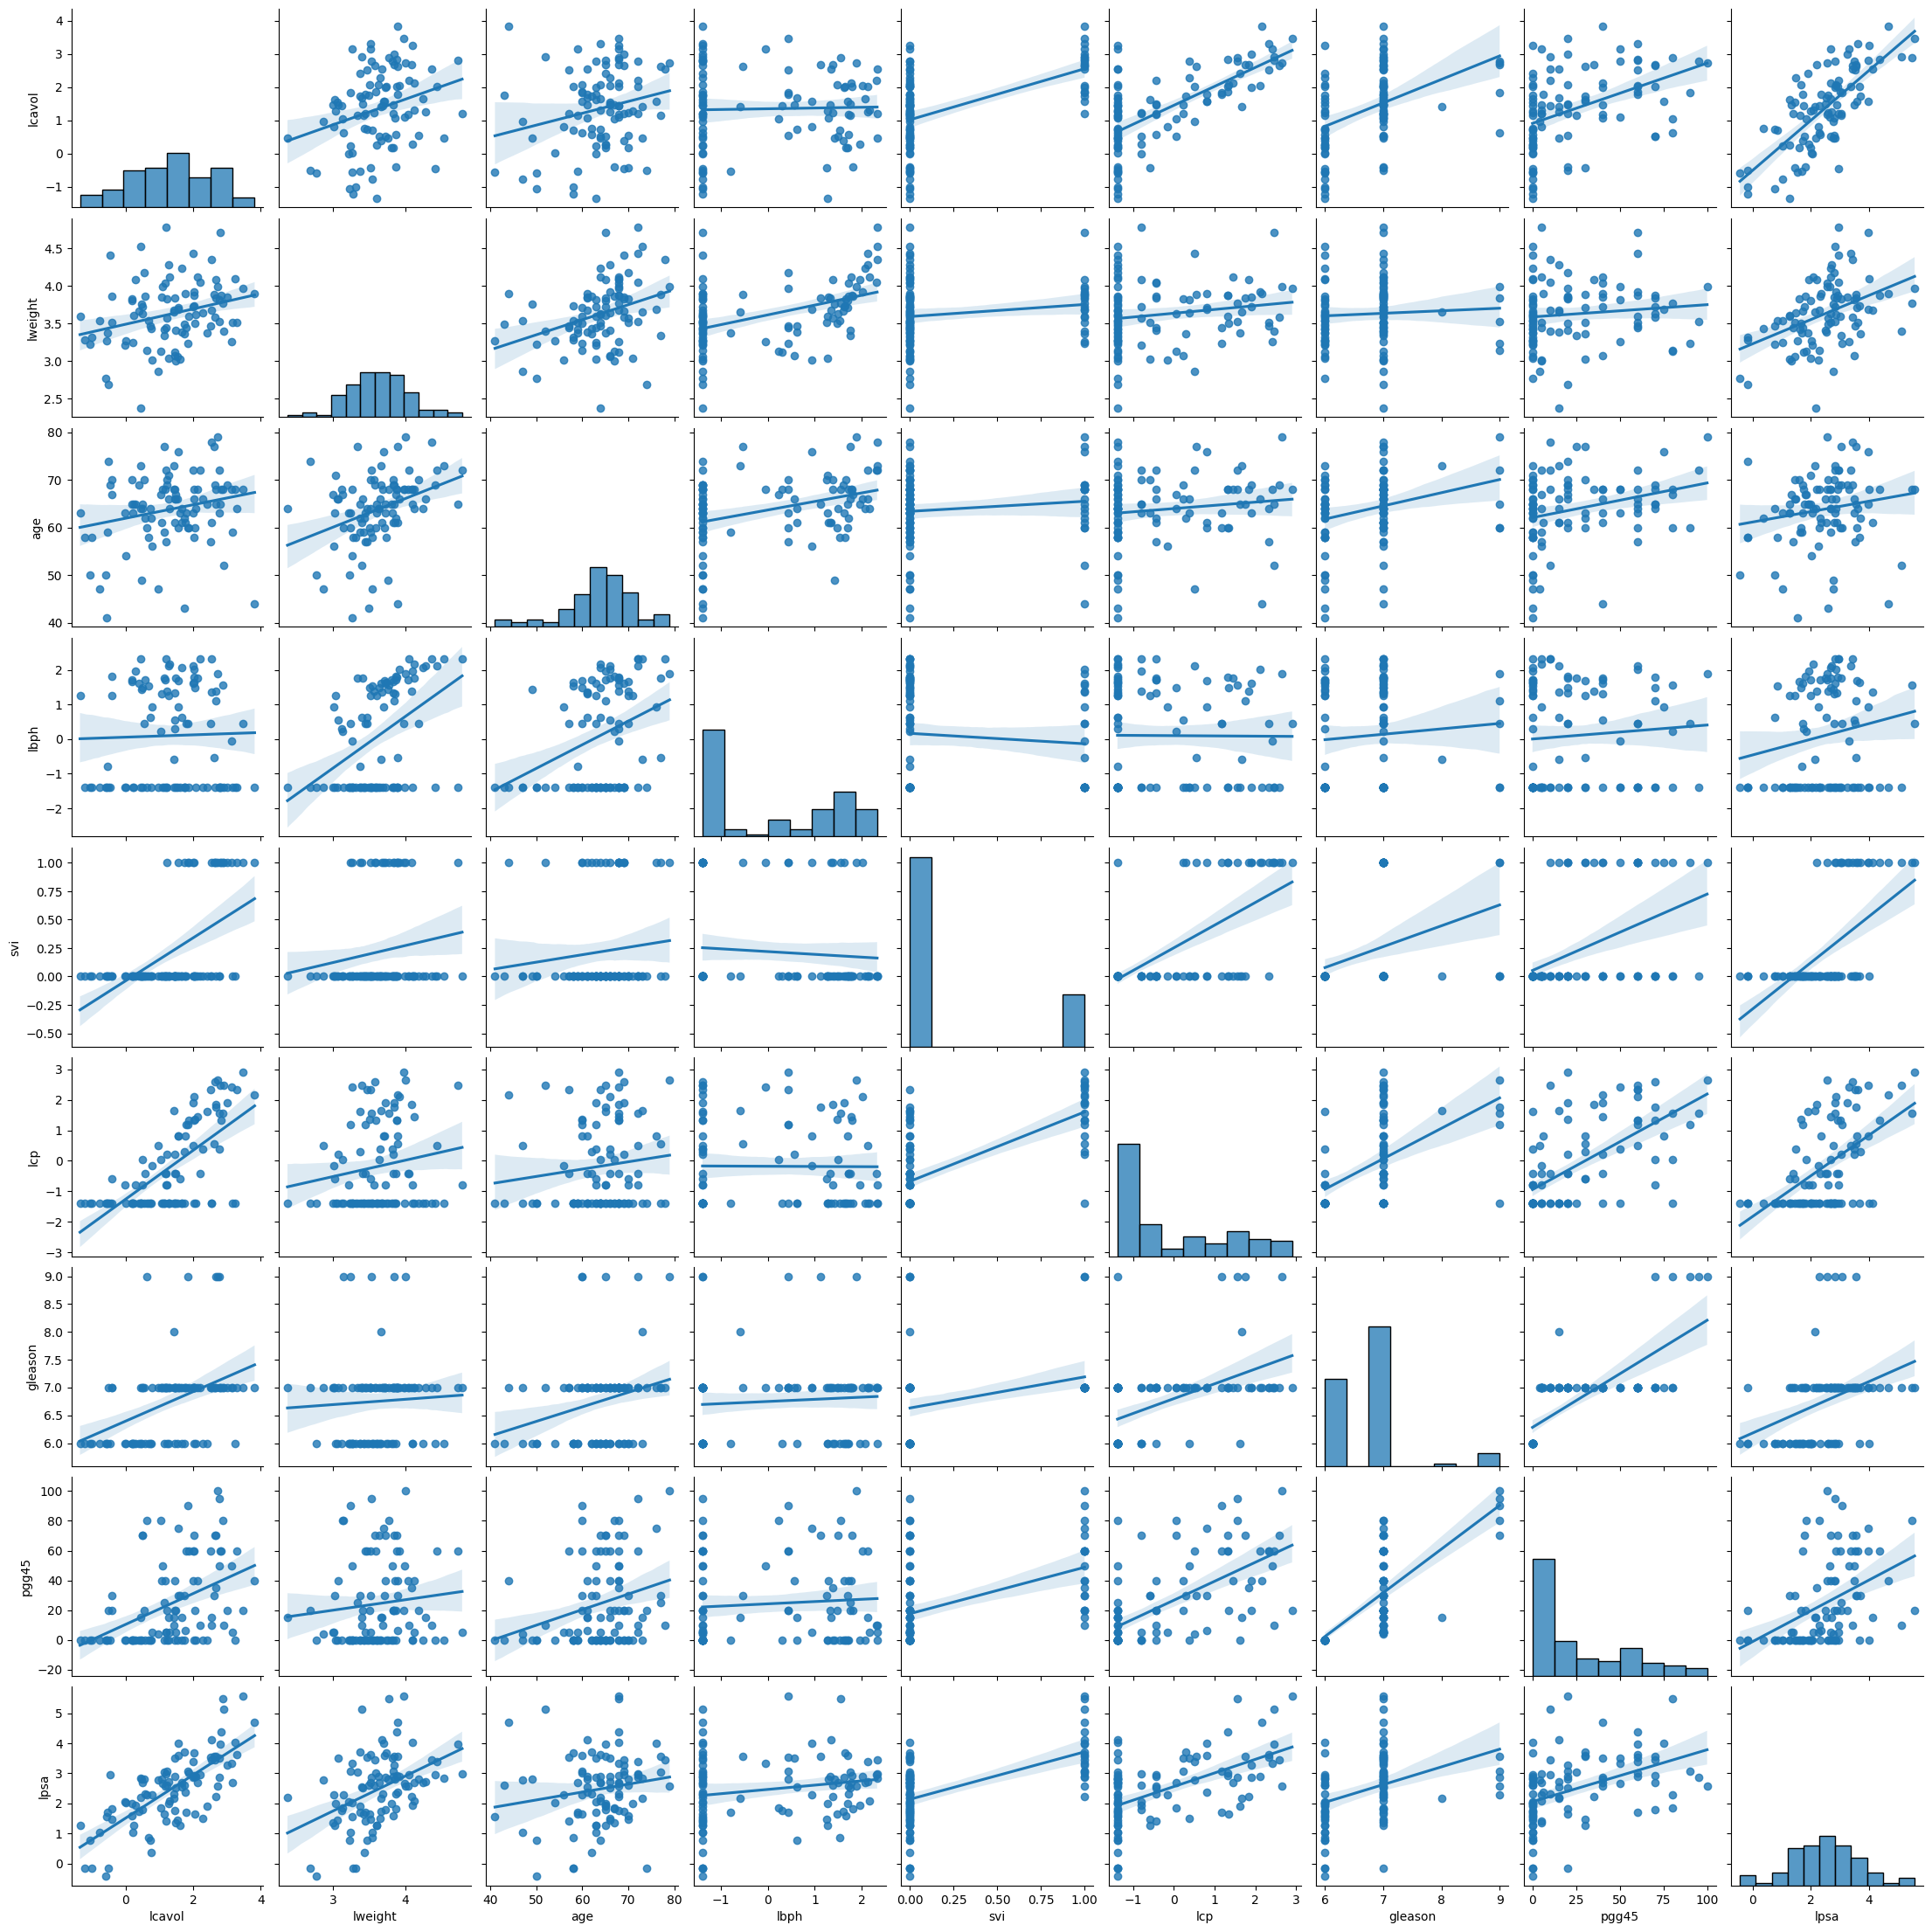

In [ ]:
#@title Display pair plots
sns.pairplot(df, kind="reg")
plt.show()

In [ ]:
#@title Split the labels and convert to numpy arrays
y_train = df_train['lpsa'].to_numpy()
X_train = df_train.copy().drop(columns = ['lpsa']).to_numpy()
y_test = df_test['lpsa'].to_numpy()
X_test = df_test.copy().drop(columns = ['lpsa']).to_numpy()

In [ ]:
class BaseLearningAlgorithm(ABC):
  """Base class for a Supervised Learning Algorithm."""

  @abstractmethod
  def train(self, X_train:np.array, y_train: np.array) -> None:
    """Trains a model from labels y and examples X."""

  @abstractmethod
  def predict(self, X_test: np.array) -> np.array:
    """Predicts on an unlabeled sample, X."""

  @property
  @abstractmethod
  def name(self) -> str:
    """Returns the name of the algorithm."""

# 1. Linear Regression with Least Squares
Implemented a class called `BasicLeastSquaresRegression` that extends `BaseLearningAlgorithm` with “vanilla” least squares regression. Computed the $\boldsymbol{\beta}$ coefficient vector and solved for $\hat{y} $ and computed the performance result as the mean squared error on the test set. Used only numpy for the solution.





In [ ]:
df.head(5)

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
64,2.073172,3.623007,64,-1.386294,0,-1.386294,6,0,2.882004
86,2.024193,3.731699,58,1.638997,0,-1.386294,6,0,3.680091
6,0.737164,3.473518,64,0.615186,0,-1.386294,6,0,0.765468
78,2.648300,3.582129,69,-1.386294,1,2.583998,7,70,3.457893
23,1.781709,3.451574,63,0.438255,0,1.178655,7,60,1.713798


$\ β$  coefficient $\ = (X^T X)^−1 X^T Y$

Source:

https://pythonnumericalmethods.berkeley.edu/notebooks/chapter16.04-Least-Squares-Regression-in-Python.html

In [ ]:
class BasicLeastSquaresRegression(BaseLearningAlgorithm):
  def train(self, X_train:np.array, y_train: np.array) -> None:
    """Trains a model from labels y and examples X."""
    X_train_with_intercept = np.hstack((np.ones((X_train.shape[0],1)), X_train)) # adding intercept
    self.w = np.dot((np.dot(np.linalg.inv(np.dot(X_train_with_intercept.T,X_train_with_intercept)),X_train_with_intercept.T)),y_train) # calculating beta value

  def predict(self, X_test: np.array) -> np.array:
    """Predicts on an unlabeled sample, X."""
    X_test_with_intercept = np.hstack((np.ones((X_test.shape[0],1)), X_test))
    Y= np.dot(X_test_with_intercept,self.w) # calculating y predictions
    return Y

  @property
  def name(self) -> str:
    method = "Basic Least Squares Regression"
    return method

In [ ]:
learning_algorithm = BasicLeastSquaresRegression()
learning_algorithm.train(X_train,y_train)
out = learning_algorithm.predict(X_test)

Source for MSE- https://towardsdatascience.com/understanding-the-3-most-common-loss-functions-for-machine-learning-regression-23e0ef3e14d3

In [ ]:
# MSE loss function
def mse_loss(y_pred, y_true):
    squared_error = (y_pred - y_true) ** 2
    sum_squared_error = np.sum(squared_error)
    loss = sum_squared_error / y_true.size
    return loss

loss = mse_loss(out,y_test)
print("MSE = ",loss)

MSE =  0.5561806405313071


Check for most important variables

In [ ]:
# getting all Beta Values
pd.DataFrame(sorted(zip(["intercept"]+list(df.columns)[:-1], abs(learning_algorithm.w)),reverse= True,key= lambda x: x[1]))

,0,1
0,lweight,0.750819
1,svi,0.718817
2,lcavol,0.572399
3,intercept,0.259517
4,lbph,0.133972
5,lcp,0.105729
6,gleason,0.034753
7,age,0.023814
8,pgg45,0.010498


Normalizing Data

In [ ]:
x_mean = np.mean(X_train, axis=0)
x_std = np.std(X_train, axis=0)
X_train_scaled = (X_train - x_mean) / x_std
X_test_scaled = (X_test - x_mean) / x_std
y_mean = np.mean(y_train, axis=0)
y_std = np.std(y_train, axis=0)
Y_train_scaled = (y_train - y_mean) / y_std
Y_test_scaled = (y_test - y_mean) / y_std

In [ ]:
# Model for normalized values
learning_algorithm_scaled = BasicLeastSquaresRegression()
learning_algorithm_scaled.train(X_train_scaled,Y_train_scaled)
out_scaled = learning_algorithm_scaled.predict(X_test_scaled)

In [ ]:
loss_scaled = mse_loss(out_scaled,Y_test_scaled)
print("MSE after normalisation = ",loss_scaled)

MSE after normalisation =  0.3583680661983362


**Insights**

**1.1** What MSE loss score do you get with Least Squares?

MSE loss score 0.5561806405313071

**1.2** What variables carry the greatest influence (i.e., are the most important) in the least squares regression?

According to Beta(coefficient) values lweight and svi carry the greatest infuence with coefficient score of 0.75 and 0.71 repectively.

**1.3** Does normalizing the data improve performance (lower MSE loss)? If so, why?


Normalizing data improved performance in our model and gave MSE loss of 0.3583680661983362. Normalization gives equal weights/importance to each variable so that no single variable steers model performance in one direction just because they are bigger numbers.

Source: https://medium.com/@urvashilluniya/why-data-normalization-is-necessary-for-machine-learning-models-681b65a05029

# 2. Linear Regression with L2 Regularization (Ridge)

Using the closed-form solution to Ridge Regression, implemented a class called `RidgeRegression` that extends `BaseLearningAlgorithm`. Iterated through the regression penalty term, $\lambda$, and plotted (a) MSE loss as a function of $\lambda$, and (b) each coefficient weight as a function of $\lambda$. Used only numpy and matplotlib for the solution.


β=(X^T X + λI)^−1 X^T y

In [ ]:
class RidgeRegression(BaseLearningAlgorithm):
  def __init__(self, alpha:float):
    self.alpha = alpha
  def train(self, X_train:np.array, y_train: np.array) -> None:
    """Trains a model from labels y and examples X."""
    self.mean = np.mean(X_train, axis=0)
    self.std = np.std(X_train, axis=0)
    self.X = (X_train - self.mean) / self.std
    self.y_mean = np.mean(y_train, axis=0)
    self.y_std = np.std(y_train, axis=0)
    self.Y = (y_train - self.y_mean) / self.y_std
    identity_matrix = np.identity(np.dot(self.X.T,self.X).shape[0])
    self.w = np.dot((np.dot(np.linalg.inv(np.dot(self.X.T,self.X)+ self.alpha * identity_matrix),self.X.T)),self.Y) # Beta calculations

  def predict(self, X_test: np.array) -> np.array:
    """Predicts on an unlabeled sample, X."""
    X_test_scaled = (X_test - self.mean) / self.std
    Y= np.dot(X_test_scaled,self.w)
    return Y

  @property
  def name(self) -> str:
    method = "Ridge Regression"
    return method

In [ ]:
# lambda_values.
lambda_values=np.array([l*0.05 for l in range(0,10000)])

# Initialize empty arrays to store coefficients, loss and beta values
coefficients = []
mse_loss_list = []
beta_values = []

for lambda_val in lambda_values:
    # Create and fit a Ridge Regression model with the current lambda value
    learning_algorithm_Ridge = RidgeRegression(alpha= lambda_val)
    learning_algorithm_Ridge.train(X_train,y_train)
    out_scaled = learning_algorithm_Ridge.predict(X_test)
    loss = mse_loss(out_scaled,Y_test_scaled)
    # Append the coefficients to the coefficients array
    coefficients.append((lambda_val,loss))
    beta_values.append(learning_algorithm_Ridge.w)
    mse_loss_list.append(loss)

In [ ]:
lambdaValue, mse = min(coefficients, key = lambda t: t[1])
print("Lowest MSE")
print("Lambda = ",lambdaValue)
print("MSE = ",mse)

Lowest MSE
Lambda =  121.10000000000001
MSE =  0.31027252846275993


In [ ]:
# Beta values
alpha = 121.10000000000001
learning_algorithm_Ridge = RidgeRegression(alpha)
learning_algorithm_Ridge.train(X_train,y_train)
out_scaled = learning_algorithm_Ridge.predict(X_test)
loss = mse_loss(out_scaled,Y_test_scaled)
pd.DataFrame(sorted(zip(list(df.columns)[:-1], abs(learning_algorithm_Ridge.w)),reverse= True,key= lambda x: x[1]))

,0,1
0,lcavol,0.181277
1,svi,0.126989
2,lweight,0.118981
3,lcp,0.102295
4,pgg45,0.082576
5,lbph,0.062291
6,gleason,0.060026
7,age,0.007795


In [ ]:
coefficients_array = np.array(beta_values) # converting list to numpy array for plotting

In [ ]:
feature = list(df.columns)[:-1] # Keeping feature names as list to add as legend in graphs

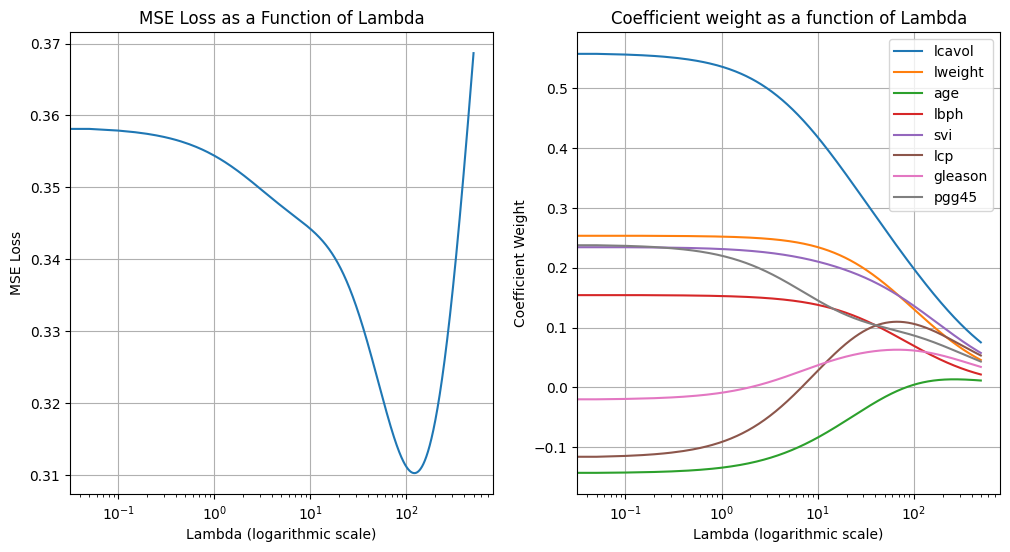

In [ ]:
# Plot the MSE loss as a function of lambda
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(lambda_values, mse_loss_list)
plt.xscale('log')
plt.xlabel('Lambda (logarithmic scale)')
plt.ylabel('MSE Loss')
plt.grid(True)
plt.title('MSE Loss as a Function of Lambda')

# Plot each coefficient weight as a function of lambda
plt.subplot(1, 2, 2)
for i in range(coefficients_array.shape[1]):
    plt.plot(lambda_values, coefficients_array[:, i], label=feature[i])
    plt.xscale('log')
    plt.xlabel('Lambda (logarithmic scale)')
    plt.ylabel('Coefficient Weight')
    plt.grid(True)
    plt.legend(loc='best')
    plt.title('Coefficient weight as a function of Lambda')

In [ ]:
# Compare the results from part 1, when  λ=0
learning_algorithm_Ridge = RidgeRegression(alpha=0)
learning_algorithm_Ridge.train(X_train,y_train)
out_scaled = learning_algorithm_Ridge.predict(X_test)
loss = mse_loss(out_scaled,Y_test_scaled)
print("MSE when λ is 0 = ",loss)

MSE when λ is 0 =  0.3583680661983362


**Insights:**


**2.1** What $\lambda$ do you get the best performance (i.e., lowest MSE)?

$\lambda$ = 121.10000000000001 gave me the best performance with MSE loss of 0.31027252846275993

**2.2** Compare the results from part 1, when $\lambda = 0$. Why are the results similar or different?

When $\lambda = 0$, the MSE loss was same as loss of Part 1, i.e. 0.3583680661983362. This is because in the equation "β=(X^T X + λI)^−1 X^T y", λI becomes zero and equation becomes same as Least Square regression equation.

In part 2 we get the best performance for $\lambda = 121.1$ and the MSE loss was lower than MSE loss in part 1. It is because in ridge regression $\lambda$ value regularizes the weights which prevents overfitting.

**2.3** Compare the weights with the weights from part 1? If you were to rank descending by the absolute value of the weights, how different is the ordering with part 1? Is the most important variable in part 1 the same as in part 2? If not, can you provide a reason?

The top 3 variables are different in part 1 and part 2-

Part 1 order- lweight, svi, lcavol

Part 2 order- lcavol, svi, lweight

The most important weight is different because the weights have been regularized to reduce overfitting and noise which changes the importance of features in comparison to part 1 but the top 3 features remain same in both the parts.

# 3. Linear Regression with L1 Regularization (Lasso)

Unlike Ridge Regression, there is no closed-form solution for Lasso, meaning there is no normal equation we can solve to immediately get all of our ideal model parameters. While it can be solved by minimizing one coordinate a time using a technique called [Coordinate Descent](http://www.adeveloperdiary.com/data-science/machine-learning/introduction-to-coordinate-descent-using-least-squares-regression/), here we can implement our solution using Scikit-Learn Lasso inside a class called `LassoRegression` which also extends `BaseLearningAlgorithm`. Like part 2, we iterate through the regression penalty term, $\alpha$ , and plot (a) MSE loss as a function of $\alpha$, and (b) each coefficient weight as a function of $\alpha$.

**Note**: here we swap notation a little, replacing $\lambda$ with $\alpha$ to fit with the Scikit-Learn convention.




In [ ]:
class LassoRegression(BaseLearningAlgorithm):
  def __init__(self, alpha:float):
    self.alpha = alpha
  def train(self, X_train:np.array, y_train: np.array) -> None:
    """Trains a model from labels y and examples X."""
    self.model = Lasso(alpha=self.alpha, max_iter=1000)
    self.model.fit(X_train, y_train) # Training the model

  def predict(self, X_test: np.array) -> np.array:
    """Predicts on an unlabeled sample, X."""
    return self.model.predict(X_test)

  def getCoefficient(self):
    return self.model.coef_ # returns calculated beta value of the model

  @property
  def name(self) -> str:
    method = "Lasso Regression"
    return method

In [ ]:
lambda_values_lasso=np.array([l*0.01 for l in range(1,100)])
# Initialize empty arrays to store coefficients, loss and beta values
coefficients = []
mse_loss_list = []
beta_list = []

for lambda_val in lambda_values_lasso:
  # Create and fit a Ridge Regression model with the current lambda value
  learning_algorithm_Lasso = LassoRegression(alpha= lambda_val)
  learning_algorithm_Lasso.train(X_train_scaled,Y_train_scaled)
  out_scaled = learning_algorithm_Lasso.predict(X_test_scaled)
  loss = mse_loss(out_scaled,Y_test_scaled)
  # Append the coefficients to the coefficients list
  coefficients.append((lambda_val,loss))
  mse_loss_list.append(loss)
  beta_list.append(learning_algorithm_Lasso.getCoefficient().tolist())
coefficients_array = np.array(beta_list)

In [ ]:
alpha, mse = min(coefficients, key = lambda t: t[1])
print("Lowest MSE:")
print("Alpha = ",alpha)
print("MSE = ",mse)

Lowest MSE:
Alpha =  0.18
MSE =  0.251489393349449


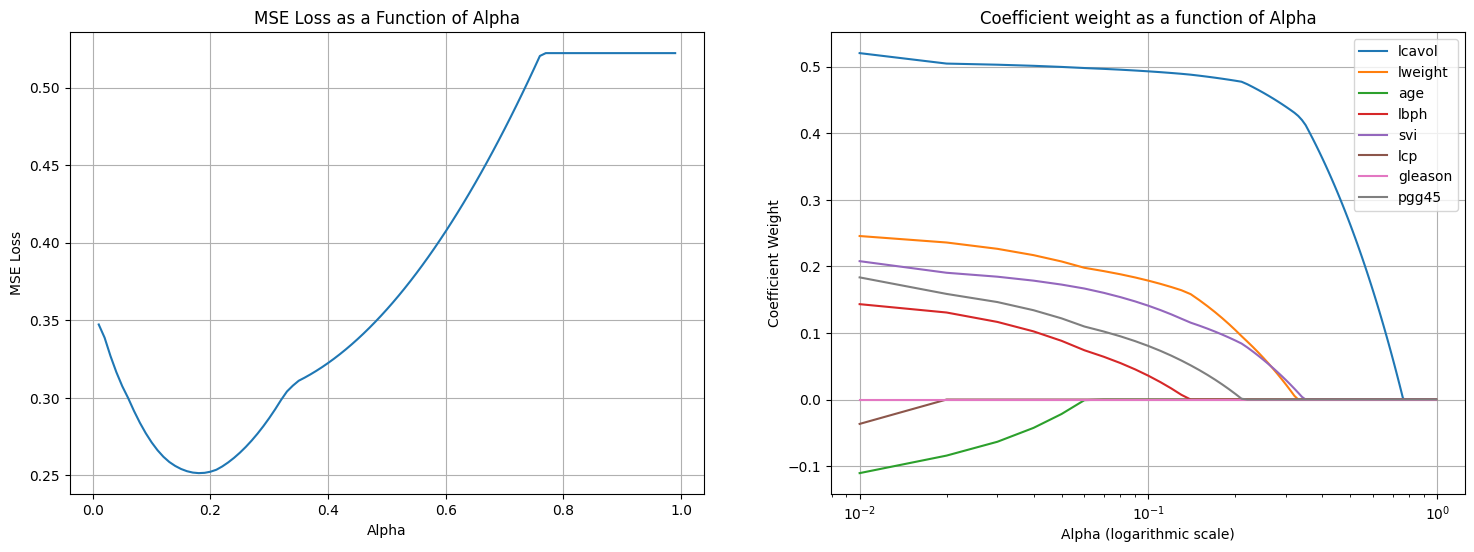

In [ ]:
# Plot the MSE loss as a function of alpha
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
plt.plot(lambda_values_lasso, mse_loss_list)
# plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('MSE Loss')
plt.grid(True)
plt.title('MSE Loss as a Function of Alpha')

# Plot each coefficient weight as a function of alpha
plt.subplot(1, 2, 2)
for i in range(coefficients_array.shape[1]):
    plt.plot(lambda_values_lasso, coefficients_array[:, i], label=feature[i])
    plt.xscale('log')
    plt.xlabel('Alpha (logarithmic scale)')
    plt.ylabel('Coefficient Weight')
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.title('Coefficient weight as a function of Alpha')

In [ ]:
#  Beta values for alpha = 0.18
learning_algorithm_Lasso = LassoRegression(alpha= 0.18)
learning_algorithm_Lasso.train(X_train_scaled,Y_train_scaled)
out_scaled = learning_algorithm_Lasso.predict(X_test_scaled)
pd.DataFrame(sorted(zip(list(df.columns)[:-1], abs(learning_algorithm_Lasso.getCoefficient())),reverse= True,key= lambda x: x[1]))

,0,1
0,lcavol,0.481894
1,lweight,0.122228
2,svi,0.097522
3,pgg45,0.022671
4,age,0.000000
5,lbph,0.000000
6,lcp,0.000000
7,gleason,0.000000


**Insights:**

**3.1** Under what conditions would you prefer L2 or L1 regression over vice versa? (Consider the discussion in Hastie 3.6.)

Lasso regression(L1) helps us remove the noise by making weight some features as 0. Ridge regression(L2) on the other hand, decreases the weight for each feature evenly. Hence, L1 is better when we want to remove some features which are noise or irrelevant and L2 is better when all features are relevant and cannot be ignored.

**3.2** Why do some coefficients become zero? Do you think this may be a method of subset selection as described in Hastie 3.3?

L1 regularization adds a penalty to compress the coefficients which encourages coefficients to become zero. Hence it can result in some coefficients becoming zero.

I think lasso regression is combination of subset selection and ridge regression, where some coefficient are made 0 which is kind of continuous subset selection and non-zero coefficients are regularized which is similar to ridge regression.
(Source: Hastie 3.4)

**3.3** Which method performs better (i.e., has the lower MSE)?

L1 performs better and has a MSE of 0.251489393349449 compared to MSE of 0.31027252846275993 for L2

**3.4** Comparing the relative ranking of the weights at the lowest MSE, do Ridge Regression and Lasso Regression “agree” on the most important weights?

Ranking of L1 - lcavol, lweight, svi

Ranking of L2 - lcavol, svi, lweight

Ridge Regression and Lasso Regression agree on the most important weight but do not agree on subsequent weights. As shown above, the second and third ranked weights have switched places for the two algorithms.

**3.5** In your own words, define **bias** and **variance**. Describe how bias and variance affected the results of parts 1, 2, and 3.

Bias: It is the error caused by the inability of the model to capture the relationship between different features causing a difference between the true value and the predicted value. If the bias is high, it means that the model is unable to capture the patterns and that the model is underfitting.

Variance: It is the variance in prediction of unseen data. If the variance is high, it means that the model is taking into consideration the noise in the features and model is overfitting, i.e. it performs very well in training data but gives poor performance in unseen data.

In least square regression the bias is low as it tries to minimize the difference between true values and predicted values. But, it has comparitively high variance as it takes into account all the features(some of which may be noise)

In Ridge regression, bias is added by using lambda to shrink the coefficients towards 0. We can see the weight of features are low in comparison to Least square regression. Hence, it has low variance as it reduces the weights of irrelevant features. But if lambda is too high it can result in underfitting of model(high bias).

In lasso regression, bias is added by adding alpha to shrink coefficient and making weights of some coefficients 0. Hence it reduces variance by removing noise from the features(including some top weighed features from our least square and ridge model) but it may lead to high bias if it excludes any relevant features.

# 4.  Iterative Optimization with Gradient Descent
Implemented a class called `RidgeRegressionGradDescent` that extends `BaseLearningAlgorithm` that performs linear regression with L2 regularization using [gradient descent](https://www.deeplearningbook.org/contents/numerical.html), Goodfellow 4.5. Plotted both training and test MSE loss result vs. iteration.  Iterated through the regression penalty term, $\lambda$ , and plotted (a) MSE loss as a function of $\lambda$, and (b) each coefficient weight as a function of $\lambda$. Used only numpy and matplotlib for the solution.


Source: https://www.geeksforgeeks.org/implementation-of-ridge-regression-from-scratch-using-python/#

In [ ]:
class RidgeRegressionGradDescent (BaseLearningAlgorithm):
  def __init__(self, alpha: float, learning_rate: float, num_iterations: int, y_test: np.array, X_test:np.array):
    self.alpha = alpha
    self.learning_rate = learning_rate
    self.num_iterations = num_iterations
    self.y_test = y_test
    self.X_test = X_test

  def train(self, X_train:np.array, y_train: np.array) -> None:
    """Trains a model from labels y and examples X."""
    self.m, self.n = X_train.shape # no of training examples, no of features
    # self.w = np.random.randn( self.n ) # weight initialization
    self.w = np.zeros(self.n)
    self.b = 0
    self.X = X_train
    self.Y = y_train
    self.beta_array = [self.w]
    self.mse_loss_train = []
    self.mse_loss_test = []
    for _ in range(self.num_iterations):
      # Compute the gradient of the Ridge Regression loss
      dW, dB = self.compute_gradient(self.X, self.Y) # Weights gradient, Bias gradient
      # Update coefficients using dW, dB
      self.w = self.w - self.learning_rate * dW
      self.b = self.b - self.learning_rate * dB
      self.beta_array.append(self.w)

  def predict(self, X_test: np.array) -> np.array:
    """Predicts on an unlabeled sample, X."""
    self.mse_loss_train.append(self.mse_loss(np.dot(self.X,self.w),self.Y))
    self.mse_loss_test.append(self.mse_loss(np.dot(self.X_test,self.w),self.y_test))
    Y= np.dot(X_test,self.w)
    return Y

  def compute_gradient(self, X: np.array, y: np.array) -> np.array:
    # Compute the gradient of the Ridge Regression loss
    y_pred = self.predict(X)
    dW = (-2 * np.dot(X.T, (y - y_pred)) + 2 * self.alpha * self.w) / self.m
    db = - 2 * np.sum( self.Y - y_pred ) / self.m
    return dW,db

  def mse_loss(self, y_pred, y_true):
    squared_error = (y_pred - y_true) ** 2
    sum_squared_error = np.sum(squared_error)
    loss = sum_squared_error / y_true.size
    return loss

  @property
  def name(self) -> str:
    method = "Ridge Regression Gradient Descent "
    return method

In [ ]:
# Keeping lambda as 121.1 (best lambda from part 2) to get MSE vs Iteration values
learning_algorithm_Ridge_gradDes = RidgeRegressionGradDescent(alpha=121.1, num_iterations=1000, learning_rate=0.01, y_test= Y_test_scaled, X_test=X_test_scaled)
learning_algorithm_Ridge_gradDes.train(X_train_scaled,Y_train_scaled)
out_scaled = learning_algorithm_Ridge_gradDes.predict(X_test_scaled) # calculating Y predictions
loss = mse_loss(out_scaled,Y_test_scaled)
coefficients_array = np.array(learning_algorithm_Ridge_gradDes.beta_array)
print("lambda = 121.1")
print("MSE = ",loss)

lambda = 121.1
MSE =  0.31027252846275993


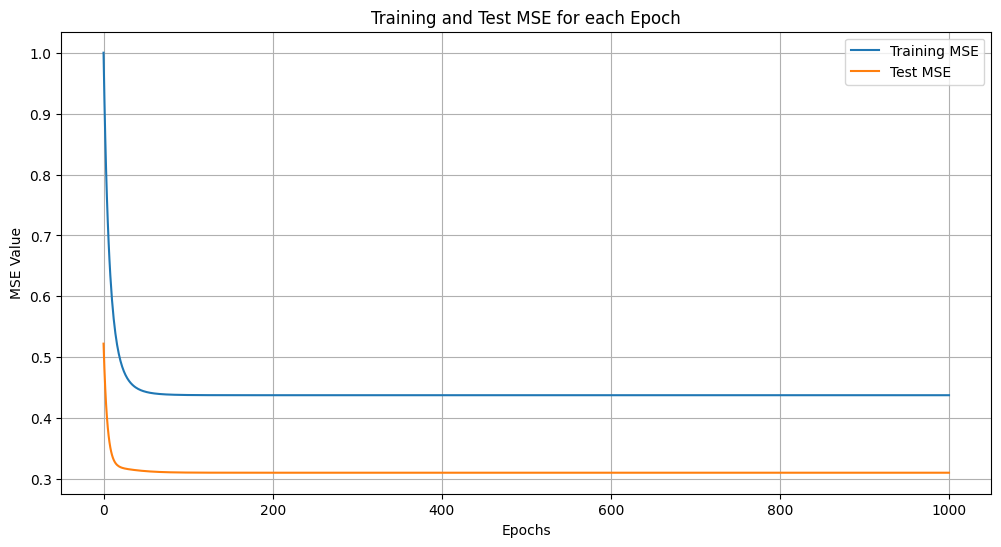

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(len(learning_algorithm_Ridge_gradDes.mse_loss_train)), learning_algorithm_Ridge_gradDes.mse_loss_train, label='Training MSE')
plt.plot(range(len(learning_algorithm_Ridge_gradDes.mse_loss_test)), learning_algorithm_Ridge_gradDes.mse_loss_test, label='Test MSE')
# plt.xscale('log')
plt.xlabel('Epochs')
plt.ylabel('MSE Value')
plt.title('Training and Test MSE for each Epoch')
plt.legend()
plt.grid(True)
plt.show()

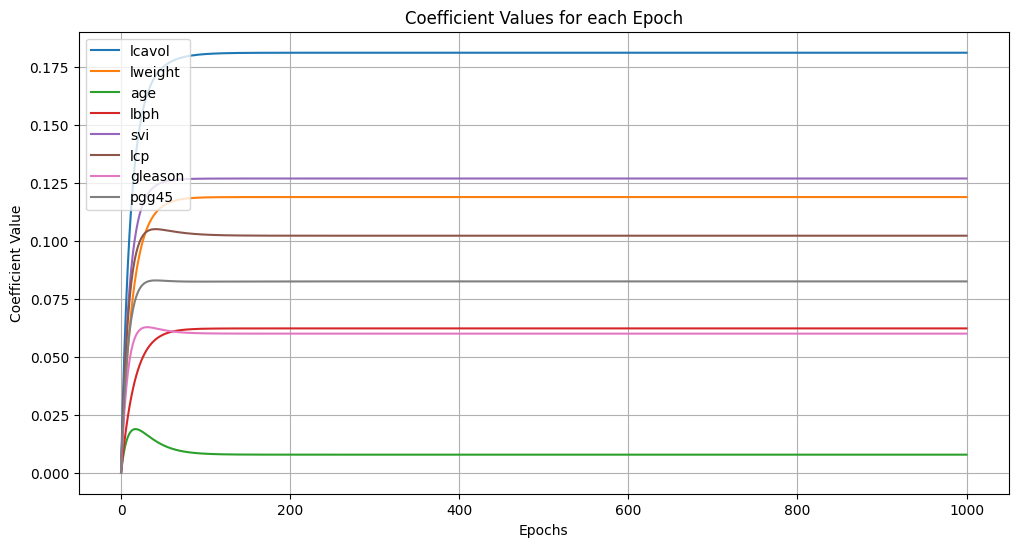

In [ ]:
plt.figure(figsize=(12, 6))
for i in range(coefficients_array.shape[1]):
  plt.plot(range(len(coefficients_array[:, i])), coefficients_array[:, i], label=feature[i])

# plt.xscale('log')
plt.xlabel('Epochs')
plt.ylabel('Coefficient Value')
plt.title('Coefficient Values for each Epoch')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
lambda_values_list=np.array([l*0.1 for l in range(1,3000)])

# Initialize empty arrays to store coefficients
test_mse_values = []
coefficient_list = []
coefficients = []
# Perform the regularization path
for lambda_val in lambda_values_list:
  # Create and fit a Ridge Regression model with the current lambda value
  learning_algorithm_Ridge_gradDes = RidgeRegressionGradDescent(alpha=lambda_val, num_iterations=1000, learning_rate=0.01, y_test= Y_test_scaled, X_test=X_test_scaled)
  learning_algorithm_Ridge_gradDes.train(X_train_scaled,Y_train_scaled)
  y_test_pred = learning_algorithm_Ridge_gradDes.predict(X_test_scaled)
  test_mse = mse_loss(y_test_pred,Y_test_scaled)
  test_mse_values.append(test_mse)
  # Append the coefficients to the coefficients array
  coefficient_list.append((lambda_val,test_mse,learning_algorithm_Ridge_gradDes.w))
  coefficients.append(learning_algorithm_Ridge_gradDes.w)
coefficients_array = np.array(coefficients)

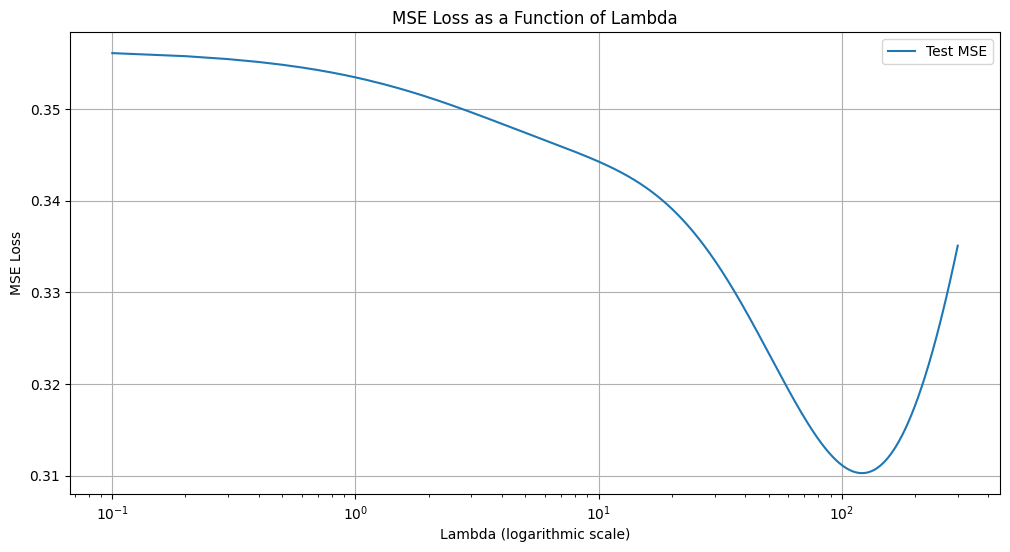

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(lambda_values_list, test_mse_values, label='Test MSE')
plt.xscale('log')
plt.xlabel('Lambda (logarithmic scale)')
plt.ylabel('MSE Loss')
plt.title('MSE Loss as a Function of Lambda')
plt.legend()
plt.grid(True)
plt.show()

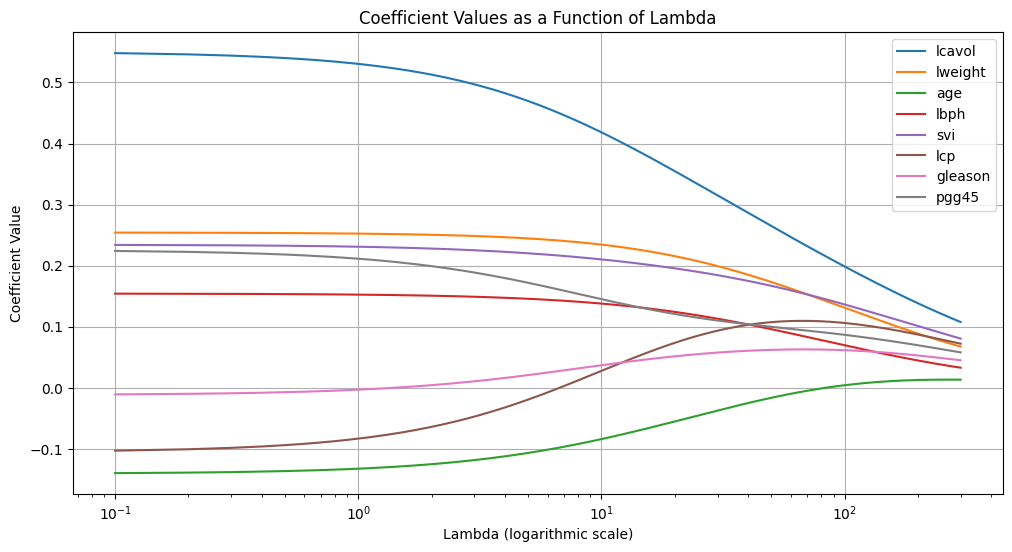

In [ ]:
plt.figure(figsize=(12, 6))
for i in range(coefficients_array.shape[1]):
  plt.plot(lambda_values_list, coefficients_array[:, i], label=feature[i])

plt.xscale('log')
plt.xlabel('Lambda (logarithmic scale)')
plt.ylabel('Coefficient Value')
plt.title('Coefficient Values as a Function of Lambda')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
lambda_val, mseLoss, betaValue = min(coefficient_list, key = lambda t: t[1])
print("Lowest MSE:")
print("Lambda = ",lambda_val)
print("MSE = ",mseLoss)

Lowest MSE:
Lambda =  121.10000000000001
MSE =  0.31027252846275993


Beta values:

In [ ]:
pd.DataFrame(sorted(zip(list(df.columns)[:-1], abs(betaValue)),reverse= True,key= lambda x: x[1]))

,0,1
0,lcavol,0.181277
1,svi,0.126989
2,lweight,0.118981
3,lcp,0.102295
4,pgg45,0.082576
5,lbph,0.062291
6,gleason,0.060026
7,age,0.007795


**Insights:**

**4.1** How many iterations are required to converge, and are there any performance differences compared to part 2?

Looking at the coefficients vs epochs graph we can see that it takes around 250 iterations to converge for learning rate of 0.01. There is no difference in the performance compared to part 2 and we get the same MSE Loss of 0.31027252846275993 and same lambda = 121.1

**4.2** Derive the gradient of L2 regularization loss. Encode your answer as [$\LaTeX$ equations](https://colab.research.google.com/github/bebi103a/bebi103a.github.io/blob/master/lessons/00/intro_to_latex.ipynb), and justify every step, please.

  $\ L_2(w) = L(w) + \lambda ||w||^2$
  
  where:

  $\ L(w)$ is the original loss function

  $\ w$ is the vector of model parameters.

  $\ λ$ is the regularization parameter and,

  $\ ||w||^2 = (|w_1|^2 + |w_2|^2 + ... + |w_N|^2)^\frac{1}{2}$

Hence,

 $\ L_2(w) = (wx + b - y)^2 + \lambda ||w||^2$

 where $\ b$ is the bias and $\ x$ is the input data

 To find the gradient, we take derivative of the L2 equation:

$\frac{\partial L_2}{\partial w} = 2x(wx +b -y) +2 \lambda w$

which gives us the gradient of $\ L_2$ Regularization Loss.


**4.3** Do you converge on the same minimum loss value? How do the coefficients compare to part 1?

Yes we converge on same minimum loss value as Ridge regression.

In comparison to part 1 the top 3 coefficients are but in different order.

order in part 1 - lweight, svi, lcavol

order in part 4 - lcavol, svi, lweight


#5. Iterative Optimization using Coordinate Descent

Using just numpy reimplemented part 3 with coordinate descent. Like part 3, iterated through the regression penalty term, $\lambda$, and plotted (a) MSE loss as a function of $\lambda$, and (b) each coefficient weight as a function of $\lambda$. Used only numpy and matplotlib for the solution.



Source:

https://xavierbourretsicotte.github.io/lasso_implementation.html

https://github.com/minatosato/Lasso/blob/master/coordinate_descent_lasso.py

In [ ]:
class LassoRegressionCoordinateDescent(BaseLearningAlgorithm):

  def __init__(self, alpha:float,num_iterations: int, initial_theta):
    self.alpha = alpha
    self.num_iterations = num_iterations
    self.w = initial_theta


  def train(self, X_train:np.array, y_train: np.array) -> None:
    """Trains a model from labels y and examples X."""
    self.m, self.n = X_train.shape
    #Looping until max number of iterations
    for i in range(self.num_iterations):
      #Looping through each coordinate
      for j in range(self.n):
        #Vectorized implementation
        rho = self.compute_rho_j(X_train, y_train, j)
        self.w[j] =  self.soft_threshold(rho, self.alpha*X_train.shape[0]) / (X_train[:, j]**2).sum()

  def predict(self, X_test: np.array) -> np.array:
    """Predicts on an unlabeled sample, X."""
    Y= np.dot(X_test,self.w)
    return Y

  def compute_rho_j(self, X, y, j):
    X_k = np.delete(X,j,axis=1) #Remove the j variable i.e. j column
    w_k = np.delete(self.w,j) #Remove the weight j
    predict = np.dot(X_k, w_k.T)
    residual = y - predict
    X_j=X[:,j] # m*1 vector
    rho_j = np.dot(X_j,residual)
    return(rho_j)

  def soft_threshold(self, x:float, lambda_:float):
    '''Soft threshold function used for normalized data and lasso regression'''
    if x > 0.0 and lambda_ < abs(x):
      return x - lambda_
    elif x < 0.0 and lambda_ < abs(x):
      return x + lambda_
    else:
      return 0.0

  @property
  def name(self) -> str:
    method = "Lasso Regression with Coordinate Descent"
    return method

In [ ]:
lambda_values_list=np.array([l*0.01 for l in range(1,100)])
initial_theta = np.ones((X_train_scaled.shape[1],1))
# Initialize empty arrays to store coefficients, loss and beta values
coefficients = []
mse_loss_list = []
beta_list = []

# Perform the regularization path
for lambda_val in lambda_values_list:
  # Create and fit a Ridge Regression model with the current lambda value
  model_coordinate_descent = LassoRegressionCoordinateDescent(alpha= lambda_val, num_iterations=1000, initial_theta= initial_theta)
  model_coordinate_descent.train(X_train_scaled,Y_train_scaled)
  out = model_coordinate_descent.predict(X_test_scaled)
  loss = mse_loss(out.T,Y_test_scaled)
  # Append the coefficients to the coefficients list
  coefficients.append((lambda_val,loss))
  mse_loss_list.append(loss)
  beta_list.append(list(model_coordinate_descent.w.flatten()))
coefficients_array = np.array(beta_list)

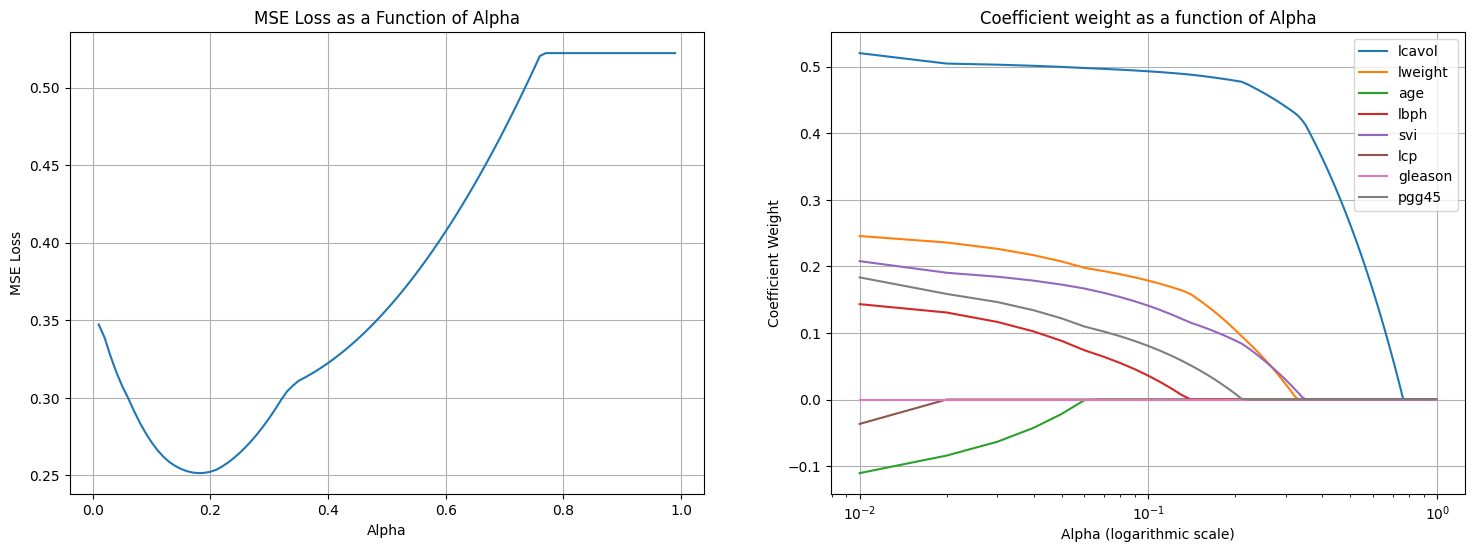

In [ ]:
# Plot the MSE loss as a function of alpha
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
plt.plot(lambda_values_list, mse_loss_list)
# plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('MSE Loss')
plt.grid(True)
plt.title('MSE Loss as a Function of Alpha')

# Plot each coefficient weight as a function of alpha
plt.subplot(1, 2, 2)
for i in range(coefficients_array.shape[1]):
    plt.plot(lambda_values_list, coefficients_array[:, i], label=feature[i])
    plt.xscale('log')
    plt.xlabel('Alpha (logarithmic scale)')
    plt.ylabel('Coefficient Weight')
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.title('Coefficient weight as a function of Alpha')

In [ ]:
alpha, mse = min(coefficients, key = lambda t: t[1])
print("Alpha = ",alpha)
print("MSE = ",mse)

Alpha =  0.18
MSE =  0.25149411707724995


In [ ]:
new_model_coordinate_descent = LassoRegressionCoordinateDescent(alpha= 0.18, num_iterations=1000, initial_theta= initial_theta)
new_model_coordinate_descent.train(X_train_scaled,Y_train_scaled)
pd.DataFrame(sorted(zip(list(df.columns)[:-1], abs(new_model_coordinate_descent.w)),reverse= True,key= lambda x: x[1]))

,0,1
0,lcavol,[0.48190932693468763]
1,lweight,[0.12223224475002105]
2,svi,[0.09749861902381478]
3,pgg45,[0.0226738651258499]
4,age,[0.0]
5,lbph,[0.0]
6,lcp,[0.0]
7,gleason,[0.0]


**Insights:**

**5.1** How does your implementation compare with Scikit-Learn’s implementation in terms of minimum MSE loss and coefficients?

The implementation gives the same MSE loss and beta values as part 3.

**5.2** Is the optimization surface convex or non-convex?

Since the plotted graphs have only one extremum point, we can say that the optimization surface is convex.

**5.3** What makes the optimization surface *non-smooth* and how is coordinate descent able to overcome this problem?

Non smooth surface occurs if there are no continuous derivative for each point which can cause irregularities in graph. Coordinate descent optimizes one feature weight at a time while not changing other weights which helps it overcome the problem.